### 多出力モデル

単純な例として、データの様々な特性を同時に予測するネットワーク。<br>

同一の匿名ユーザーによるSNSの一連の投稿を入力として、<br>
そのユーザーの「年齢・性別・所得水準」といった複数の属性を予測しようとするネットワークが考えられる。<br>

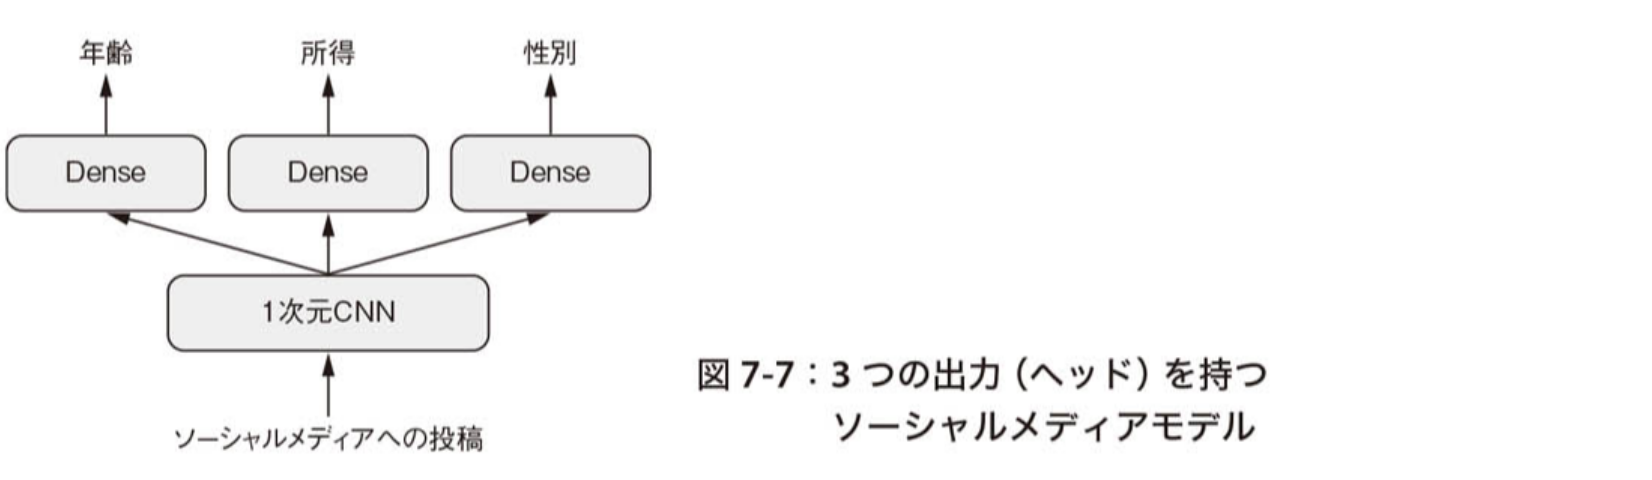

In [1]:
# 画像の表示
from IPython.display import Image
Image(filename='06.png', width=600)

### 3つの出力を持つモデルのFunctional APIの実装

In [5]:
from keras import layers
from keras import Input 
from keras.models import Model

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None, ), dtype='int32', name='post')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

# 出力層に名前がついていることに注意
age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)
model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

"""
# 多出力モデルのコンパイルオプション(複数の損失)
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])
"""

"""
# 上記と同じ（出力層に名前をつけている場合のみ可能）
model.compile(optimizer='rmsprop',
             loss={
                 'age':'mse',
                 'income':'categorical_crossentropy',
                 'gender':'binary_crossentropy'
             })
"""

# 最終的な損失値に対応して重みをつけることができる。
# MSEは一般に3 ~ 5の値。これに対し、交差エントロピーは最低で0.1になる。
# そこで、損失値の重要度のバランスを取るために重みをつける
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
             loss_weights=[0.25, 1., 10.])
"""
# 上記と同じ（出力層に名前をつけている場合のみ可能）
model.compile(optimizer='rmsprop',
             loss={
                 'age':'mse',
                 'income':'categorical_crossentropy',
                 'gender':'binary_crossentropy'
             },
             loss_weights={'age':0.25, 'income':1., 'gender':10.})
"""

# age_targets, income_targets, gender_targetsはNumpy配列と仮定
model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)

NameError: name 'age_targets' is not defined